#BIRCH (Balanced Iterative Reducing and Clustering Hierarchies)
Birch is designed for clustering large numerical datasets that can't fit into memory.<br>
So the main idea of this algorithm is to build a tree that stores information required for clustering and then perform clustering on that tree where the information needed to calculate distance is present in the labeling of nodes. This tree is called CF tree.

##Clustering Feature:
Clustering Feature (CF) is defined as triple: CF = (N, LS, SS), where<br>
N = number of data points<br>
LS = linear sum of N points i.e.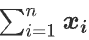 <br>
SS = square sum of N points i.e. 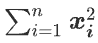<br>
For eg:<br>
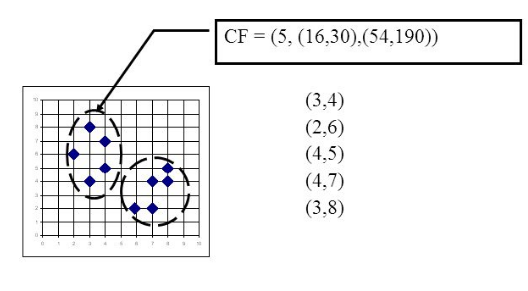

##Clustering Feature (CF) Tree:
CF tree is a balanced tree that captures the clustering features.<br>
* A non-leaf node in a tree has descendants or children <br>
* The non-leaf nodes store sums of the CFs of their children<br>

CF tree has 2 parameters namely branching factor and threshold.<br>
* Branching factor: maximum number of children i.e. the number of subclusters that can be made.
* Threshold: maximum diameter of subclusters stored at the leaf nodes.

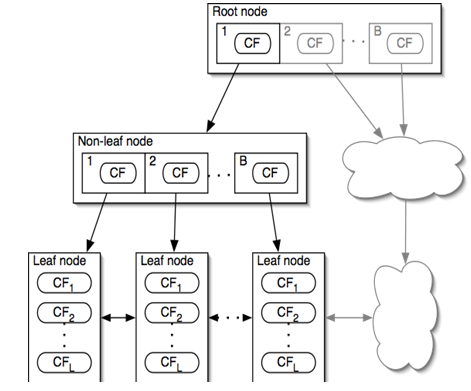


* Every node contains CF triple for each of its children.
* Each non-leaf node has at most B entries
* Each leaf node represents a cluster.
* The diameter of the subcluster must be equal to or less than the threshold value.<br>

The main phases are:<br>
* **Phase 1:** Scan the data to build an in-memory CF tree.<br>
Inserting a point in CF tree is similar to the B tree.<br>
The CF tree is constructed as the points are added. A point is added to the CF tree after scanning the tree from top to down and choosing that node/ cluster which is closest to the point you want to insert.<br>
The distance is measured between the point and the centroid of the cluster using Euclidean distance.<br>
If the diameter is greater than the threshold value then the tree is split.<br>
* **Phase 2:** Apply any clustering algorithm to cluster the leaf nodes, which removes sparse clusters as outliers and groups dense clusters into larger ones.

##Properties:
* Scalability
* Single scan of data is sufficient
* Ability to undo what was done previously
* Handle noise
* Can handle only numeric data
* Time complexity of the algorithm is O(n). Worst-case time complexity: O(n^2)

###Implementation of Birch using python:

In [68]:
#importing libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

In [69]:
#generating dataset
data, clusters = make_blobs(n_samples=1500, centers=10, cluster_std=0.50, random_state=0)

In [70]:
data.shape

(1500, 2)

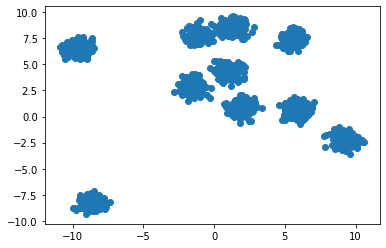

In [71]:
plt.scatter(data[:,0], data[:,1])

In [72]:
#creating a model
model = Birch(branching_factor=60, threshold=1.5, n_clusters=None)
#branching_factor: maximum number of children i.e. the number of subclusters that can be made
#threshold: maximum diameter of subclusters stored at the leaf nodes.
#n_clusters: number of clusters

In [73]:
#fitting the data into the model
model.fit(data)

Birch(branching_factor=60, compute_labels=True, copy=True, n_clusters=None,
      threshold=1.5)

In [74]:
#prediction
pred_cluster = model.predict(data)

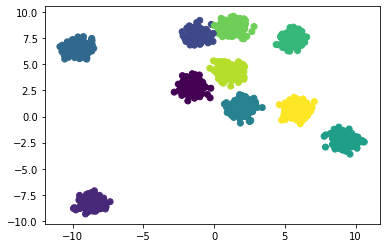

In [75]:
plt.scatter(data[:,0], data[:,1], c=pred_cluster, cmap='viridis')

####References:
https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9<br>
https://www.sciencedirect.com/topics/computer-science/clustering-feature<br>
https://analyticsindiamag.com/guide-to-birch-clustering-algorithmwith-python-codes/